<a href="https://colab.research.google.com/github/flavio641/Modelos_Aprendizados_Maquinas/blob/main/Cluster2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [71]:
df = pd.read_csv('/content/base_cluster.csv')
df

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Year_Birth,Income
0,5524,635,88,546,172,88,88,1957,58138.0
1,2174,11,1,6,2,1,6,1954,46344.0
2,4141,426,49,127,111,21,42,1965,71613.0
3,6182,11,4,20,10,3,5,1984,26646.0
4,5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0
2236,4001,406,0,30,0,0,8,1946,64014.0
2237,7270,908,48,217,32,12,24,1981,56981.0
2238,8235,428,30,214,80,30,61,1956,69245.0


In [72]:
df = df.rename(columns= {
    'MntWines': 'Total Gasto em Vinhos',
    'MntFruits': 'Total Gasto em Frutas',
    'MntMeatProducts': 'Total Gasto em Açougue',
    'MntFishProducts': 'Total gasto em Peixaria',
    'MntSweetProducts': 'Total Gasto em Doces',
    'MntGoldProds': 'Total Gasto em Jóias',
    'Year_Birth': 'Ano de Nascimento',
    'Income': 'Renda Anual'
    

})
df

,ID,Total Gasto em Vinhos,Total Gasto em Frutas,Total Gasto em Açougue,Total gasto em Peixaria,Total Gasto em Doces,Total Gasto em Jóias,Ano de Nascimento,Renda Anual
0,5524,635,88,546,172,88,88,1957,58138.0
1,2174,11,1,6,2,1,6,1954,46344.0
2,4141,426,49,127,111,21,42,1965,71613.0
3,6182,11,4,20,10,3,5,1984,26646.0
4,5324,173,43,118,46,27,15,1981,58293.0
...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0
2236,4001,406,0,30,0,0,8,1946,64014.0
2237,7270,908,48,217,32,12,24,1981,56981.0
2238,8235,428,30,214,80,30,61,1956,69245.0


In [73]:
df2 = df.set_index('ID').filter(regex= 'Tot', axis= 'columns')
df2

,Total Gasto em Vinhos,Total Gasto em Frutas,Total Gasto em Açougue,Total gasto em Peixaria,Total Gasto em Doces,Total Gasto em Jóias
ID,,,,,,
5524,635,88,546,172,88,88
2174,11,1,6,2,1,6
4141,426,49,127,111,21,42
6182,11,4,20,10,3,5
5324,173,43,118,46,27,15
...,...,...,...,...,...,...
10870,709,43,182,42,118,247
4001,406,0,30,0,0,8
7270,908,48,217,32,12,24


In [74]:
# Somar os valores por linha 
df2.sum(axis= 1)

ID
5524     1617
2174       27
4141      776
6182       53
5324      422
         ... 
10870    1341
4001      444
7270     1241
8235      843
9405      172
Length: 2240, dtype: int64

In [75]:
df3 = df2.divide(df2.sum(axis= 1), axis= 'index')
df3

,Total Gasto em Vinhos,Total Gasto em Frutas,Total Gasto em Açougue,Total gasto em Peixaria,Total Gasto em Doces,Total Gasto em Jóias
ID,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545
...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339


In [76]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 4)
km.fit(df3)

KMeans(n_clusters=4)

In [77]:
clus = km.predict(df3)
clus

array([3, 1, 1, ..., 2, 1, 1], dtype=int32)

In [78]:
np.unique(clus, return_counts= True)

(array([0, 1, 2, 3], dtype=int32), array([378, 727, 606, 529]))

In [79]:
df3.loc[:, 'Cluster'] = clus
df3


,Total Gasto em Vinhos,Total Gasto em Frutas,Total Gasto em Açougue,Total gasto em Peixaria,Total Gasto em Doces,Total Gasto em Jóias,Cluster
ID,,,,,,,
5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,3
2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,1
4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,1
6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,3
5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,1
...,...,...,...,...,...,...,...
10870,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,1
4001,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,2
7270,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,2


In [80]:
aux = df3.groupby('Cluster').mean()
aux

,Total Gasto em Vinhos,Total Gasto em Frutas,Total Gasto em Açougue,Total gasto em Peixaria,Total Gasto em Doces,Total Gasto em Jóias
Cluster,,,,,,
0,0.142992,0.106475,0.202335,0.155391,0.112987,0.279820
1,0.498326,0.041543,0.246986,0.061169,0.043877,0.108100
2,0.744348,0.014522,0.141953,0.019448,0.014014,0.065716
3,0.301681,0.059813,0.409893,0.085519,0.057923,0.085170


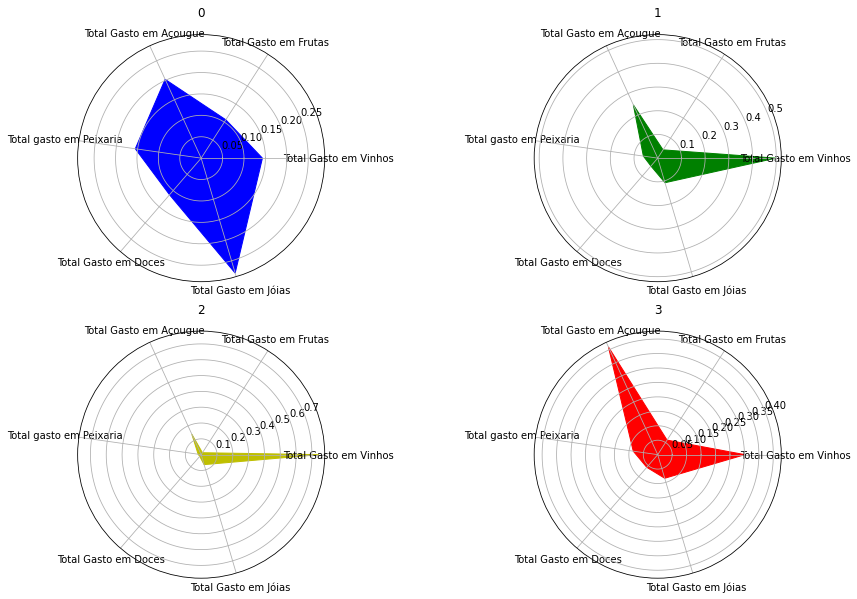

In [81]:
from matplotlib.figure import projections
plt.figure(figsize = (15,2*5))
color = ['b','g', 'y', 'r']
for cl in aux.index:
  plt.subplot(2,2, cl+ 1, projection = 'polar')
  plt.fill(aux.loc[cl], color = color[cl])
  plt.title(cl)



In [85]:
dfc.loc[:, 'Cluster'] = clus
dfc

,ID,Total Gasto em Produto,Total Gasto em Frutas,Total Gasto em Açougue,MntFishProducts,Total Gasto em Doces,Total Gasto em Jóias,Year_Birth,Income,Cluster
0,5524,635,88,546,172,88,88,1957,58138.0,3
1,2174,11,1,6,2,1,6,1954,46344.0,1
2,4141,426,49,127,111,21,42,1965,71613.0,1
3,6182,11,4,20,10,3,5,1984,26646.0,3
4,5324,173,43,118,46,27,15,1981,58293.0,1
...,...,...,...,...,...,...,...,...,...,...
2235,10870,709,43,182,42,118,247,1967,61223.0,1
2236,4001,406,0,30,0,0,8,1946,64014.0,2
2237,7270,908,48,217,32,12,24,1981,56981.0,2
2238,8235,428,30,214,80,30,61,1956,69245.0,1


In [83]:
dfc.groupby('Cluster').Year_Birth.mean()

Cluster
0    1973.825397
1    1967.763411
2    1965.064356
3    1970.937618
Name: Year_Birth, dtype: float64

In [84]:
dfc.groupby('Cluster').Income.mean()

Cluster
0    32449.954907
1    55844.881616
2    55677.612957
3    57671.922929
Name: Income, dtype: float64